### Sample program for Naive Bayes Classifier (Japanese sentences)  
Spaces should be added between Japanese words (wakati-gaki)  
単純ベイズ分類器のサンプルプログラム(日本語文)  
日本語文は分かち書きになっている必要がある。    

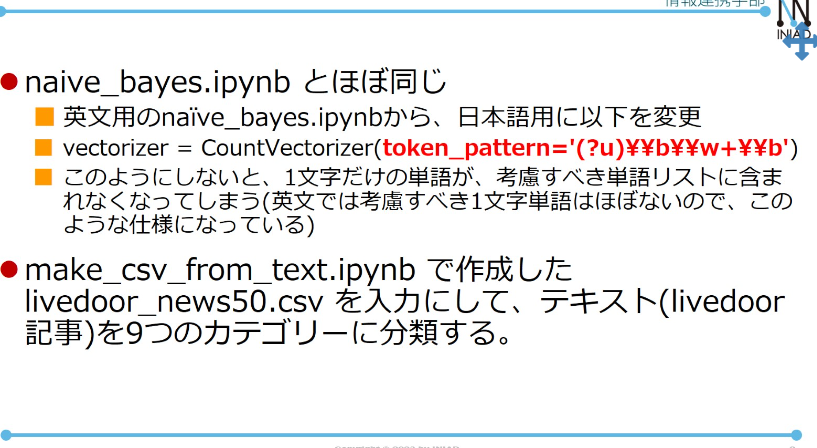

#### Import libraries  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#### Parameters  

In [2]:
csv_in = 'livedoor_news50.csv'

# To show more columns and rows  
pd.options.display.max_columns=999
pd.options.display.max_rows=999

#### Read CSV file  

In [3]:
df = pd.read_csv(csv_in, skiprows=0, delimiter=',', header=0)
display(df.head())

,category,text
0,dokujo-tsushin,友人 代表 スピーチ 、 独 女 どう こなす いる ？ もうすぐ ジューン ・ ブ...
1,dokujo-tsushin,ネット 断ち切れる 元 カレ 縁 携帯 電話 普及 する 以前 、 恋人 連絡 ツー...
2,dokujo-tsushin,相次ぐ 芸能人 “ すっぴん ” 披露 その 時 、 独 女 心境 ？ 「 男性...
3,dokujo-tsushin,ムダ 抵抗 ！ ？ 加 齢 現実 ヒップ 加 齢 変化 「 たわむ → 下がる ...
4,dokujo-tsushin,税金 払う の 私 たち ん ！ 6 月 支給 する れる 子ども 手当 、 当初 ...


#### Check categories in the data  

In [4]:
print(df['category'].value_counts())

dokujo-tsushin    50
it-life-hack      50
kaden-channel     50
livedoor-homme    50
movie-enter       50
peachy            50
smax              50
sports-watch      50
topic-news        50
Name: category, dtype: int64


#### Obtain X (data) and y (true label)     

In [5]:
X = df['text']
y = df['category']

#### Divide data into train data and test data  
NOTE: Specify random_state to fix the way of division  

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(337,) (337,)
(113,) (113,)


#### Collect words  

In [7]:
vectorizer = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
vectorizer.fit(X_train)
vocab = vectorizer.get_feature_names_out()
print('Vocabulary size:', len(vocab))
print(vocab[:10])  # debug

Vocabulary size: 14835
['0' '00' '000' '0003' '0004' '001' '001020050000' '002' '003' '0033']


#### Make BoW (word frequency vectors)     

In [8]:
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)
print('X_train_bow:')
print(repr(X_train_bow))
print('X_test_bow:')
print(repr(X_test_bow))

X_train_bow:
<337x14835 sparse matrix of type '<class 'numpy.int64'>'
	with 67676 stored elements in Compressed Sparse Row format>
X_test_bow:
<113x14835 sparse matrix of type '<class 'numpy.int64'>'
	with 20194 stored elements in Compressed Sparse Row format>


#### Display BoW  

In [9]:
Xbow = pd.DataFrame(X_train_bow.toarray(), 
                    index=y_train, columns=vocab)
display(Xbow.head())

,0,00,000,0003,0004,001,001020050000,002,003,0033,0054,007,01,0111,0120,0126,015,02,020,0272,03,04,040,045,05,06,07,08,080,082,086,0863,088,089,09,0900,0907,092,1,10,100,1000,102,1020,1024,103,107,11,110,1111,112,1120,1121,113,115,116,117,118,119,12,120,1200,1210,122,123,1234,124,125,126,128,1280,13,130,1300,132,133,135,14,140,1400,1415,1480,149,1490,15,150,1500,1521,1550,156085,15800,16,160,1600,163,1630,17,170,178,18,180,1800,1835,185,1873,188,1880,1888,189,1890,19,190,1901,1904,1907,191,192,194,1944,195,1950,1955,1957,1964,197,1970,1972,1976,1977,198,1986,199,1990,19900,1991,1993,1994,1995,1998,1999,2,20,200,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,20111014,2012,20120425,2013,2015,202,205,21,210,2100,2106,219,22,2209,221,222,223,225,226,228,23,230,2300,2312,235,2380,239,24,240,2420,245,2460,249,24989,25,250,255,256,26,2600,264,2640,268,27,270,2700,273,274,275,28,280,29,290,293,2965,299,3,30,300,3000,300000,303,3081,3090,31,311,313,316,319,32,320,321,3289,33,330,3348,336,34,3400,340181305,342,3432,3434,344,34400,345,3479,35,350,3500,3564,3582,36,360,365,366,37,3701,38,380,382,3820,3850,386,39,393,3980,399,3990,4,40,400,41,414,42,420,4250,43,430,432,438,44,441,45,450,46,460,461,47,4785,48,480,482,4883,49,490,493,4990,5,50,500,5000,5014,51,512,5159,517166201,518605974,52,520,5200,5223,525,5285,52956853,53,536,539,54,5400,541,5423,546,55,550,5500,5507825,5524,5547,5550,5558182,5571502,56,5600,5655259,5665,5720,575,5759728,5774,5788523,58,580,5801160,5801859,5828874,5858898,5860894,5865240,5893289,5895545,5899457,59,590,5900,5903899,5907591,5907639,5912695,5913219,5913471,5916688,5920,5929852,5930549,5932320,5934768,5934795,5934953,5940596,5942826,6,60,600,6000,607,611,615,6193192,62,6217912,625,6280,63,6315,64,6430,6463,65,650,66,67,670,6716997,675,68,680,686,69,692,693,699,7,70,700,7000,701,71,710,72,720,7200,73,730,74,75,750,752,76,760,768,77,770,771,7770,7777,78,7800,788,79,791,7990,8,80,800,8000,8007,802,810,8111,814,8180,82,8200,82029095,825,8255,83,830,8300,8366,8383,84,840,841,848,85,86,866,87,88,880,882,887,888,89,890,8925,8960,9,90,900,9000,907,910,92,920,925,927,93,930,94,940,941,950,96,960,968,975,980,98900,99,990,9900,995,999,9999,_,a,aac,abc,ac,access,aco,...,陣営,除,除く,陥る,陥落,陰,陰謀,陳列,陳情,陶酔,陽子,隅々,隆,隆一,隆典,隆司,隆徳,隆明,隆起,隊員,階,階段,階級,随分,随所,随時,隙間,際,際どい,際立つ,障る,障害,隠し,隠す,隠せる,隠れる,隠れ里,隣,隣り合わせる,隣接,雄,雄介,雄作,雅之,雅人,雅功,雅子,雅治,雅紀,集,集まり,集まる,集め,集める,集中,集合,集団,集約,集結,集計,雇う,雇用,雑,雑種,雑菌,雑誌,雑貨,離す,離せる,離れる,離婚,難い,難しい,難易,難点,難関,難題,雨,雨後,雪,雪だるま,雰囲気,雲,雲母,雷,電,電力,電動,電器,電圧,電子,電気,電池,電波,電源,電灯,電磁気,電磁波,電脳,電話,電話機,電車,電離,需要,震える,震わせる,震災,霊,露光,露出,露呈,青,青い,青山,青年,青春,青木,青森,青白い,青空,青龍,靖国神社,静,静か,静まりかえる,静止,静香,非,非常,非常識,非難,面,面々,面倒,面倒くさい,面白い,面積,革,革命,革新,靴,鞄,韓,韓国,音,音声,音楽,音楽家,音痴,音質,音量,音響,響く,響子,頂く,頂ける,頃,項目,順,順に,順位,順天堂大学,順次,順番,順調,須藤,預ける,預言,頑,頑張る,頑張れる,頒布,領土,頬,頬骨,頭,頭痛,頭皮,頭脳,頭部,頷ける,頻度,頻繁,頼み,頼む,頼もしい,頼り,頼る,題す,題材,額,額縁,顎,顔,顔ぶれ,顔負け,顕示,願い,願う,願望,類,顧問,顧客,風,風呂,風味,風変わり,風当たり,風情,風潮,風靡,飛,飛ばす,飛びつく,飛び交う,飛び出す,飛び出る,飛び切り,飛び火,飛び越す,飛び込み,飛び込む,飛び道具,飛ぶ,飛行船,飛躍,食,食べる,食べ物,食事,食品,食堂,食材,食欲,食物,食生活,食用,飯,飯舘,飲み物,飲む,飲める,飲料,飲食,飴,飽きる,飾り,飾り棚,飾る,餅,養成,館,首,首位,首都,首飾り,香,香ばしい,香り,香る,香川,香料,香港,香織,馬,馬乗り,馬車,馴れ初め,馴染み,馴染む,馴染める,駅,駅前,駅弁,駆けつける,駆ける,駆け引き,駆け抜ける,駆け込む,駆る,駆使,駆動,駆逐,駐車,駒ヶ根,騎士,騎手,騒がしい,騒がす,騒ぎ,騒ぐ,騒げる,騒動,騙す,驚かす,驚き,驚く,驚愕,驚異,骨折,骨格,骨盤,骨董,高,高い,高まり,高まる,高め,高める,高価,高周波,高垣,高密度,高山,高島屋,高崎,高度,高性能,高所,高校,高校生,高橋,高画質,高知,高級,高血圧,高速,高野,高額,高齢,髙島屋,髪,髪の毛,髪型,鬼,鬼束,魂,魅せる,魅了,魅力,魅惑,魔,魔性,魔球,魚,魚油,鮮やか,鮮烈,鯉,鱈,鳥山,鳥肌,鳥類,鳴く,鳴らす,鳴る,鶏,鶴見,鷹,鹿,麗しい,麗子,麺,麻理子,麻由美,麻紀子,麻薬,麻里子,黄川田,黄色,黄金,黒,黒い,黒っぽい,黒井,黒崎,黒川,黒星,黒木,黒鳥,黙る,黙示録,鼠,鼻,齢,龍,龍之介,龍平,공개,광고,기원,넘은,도둑,도를,마르코폴로,못생긴,미스터피자,미스터피자를,빈축,빠르게,쉽고,스마트폰,열풍,옵티머스,이유는,전략,전자,주문하세요,피자,한국,한국인들이,한글자막,혐한,０,１,１つ,１月,１０月,１１月,２,２つ,２月,３,３月,４,４月,５,５月,６,６月,７,７月,８,８月,９,９月,ａ,ａ子,ａｋｂ,ａｑｕｏｓ,ａｔ,ａｔｏ,ａｕ,ａｖ,ｂ,ｂｄ,ｂｄｐ,ｂｄｚ,ｂｒｔ,ｂｓ,ｂｗｔ,ｂｚｔ,ｃ,ｃｐｕ,ｃｓ,ｄ,ｄb,ｄｌ,ｄｍｒ,ｆ,ｆｉ,ｆｓ,ｇ,ｇ１,ｇｈz,ｈ,ｈｄｄ,ｉ,ｊｒａ,ｋ,ｋｄｄｉ,ｋｇ,ｌａｎ,ｍ,ｍｃ,ｍｍ,ｎｈｋ,ｎｗｄ,ｏｋ,ｐｏｐ,ｒｂ,ｓ,ｓtore,ｓｋｐ,ｓｍａｒｂｏ,ｔ,ｔｂｓ,ｕ,ｕｓｂ,ｖ,ｖｃ,ｗ,ｗｉ,ｗｏｗ,ｗｗｗ,ｘ,ｙ,ｙｏｕｔｕｂｅ,ｚ
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

#### Training of naive Bayes classifier  

In [10]:
model = MultinomialNB(alpha=1.0)
model.fit(X_train_bow, y_train)
print(model.classes_)
train_score = model.score(X_train_bow, y_train)
print('Train accuracy:', train_score)

['dokujo-tsushin' 'it-life-hack' 'kaden-channel' 'livedoor-homme'
 'movie-enter' 'peachy' 'smax' 'sports-watch' 'topic-news']
Train accuracy: 1.0


#### Prediction using naive Bayes classifier after training  

In [11]:
# Obtain each prediction  
y_test_pred = model.predict(X_test_bow)
df_pred = pd.DataFrame({
            'pred': y_test_pred,
            'true': y_test
          }).reset_index(drop=True)
display(df_pred.head(10))

,pred,true
0,topic-news,topic-news
1,peachy,peachy
2,kaden-channel,kaden-channel
3,movie-enter,movie-enter
4,dokujo-tsushin,livedoor-homme
5,topic-news,topic-news
6,smax,smax
7,livedoor-homme,peachy
8,dokujo-tsushin,peachy
9,smax,smax


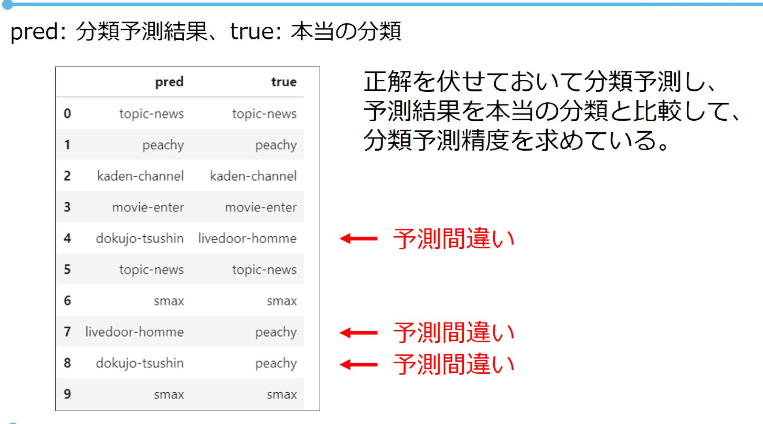

In [12]:
# Make crosstable  
ctab = pd.crosstab(df_pred['pred'], df_pred['true'])
display(ctab)

true,dokujo-tsushin,it-life-hack,kaden-channel,livedoor-homme,movie-enter,peachy,smax,sports-watch,topic-news
pred,,,,,,,,,
dokujo-tsushin,9,0,0,1,0,1,0,1,3
it-life-hack,0,9,0,0,0,0,0,0,0
kaden-channel,0,0,9,1,0,0,0,0,0
livedoor-homme,0,1,0,10,0,1,0,1,0
movie-enter,0,0,0,1,15,0,0,0,1
peachy,0,0,0,0,0,14,0,0,0
smax,0,1,0,2,0,0,11,0,2
sports-watch,0,0,0,0,0,0,0,10,0
topic-news,0,0,0,0,0,0,0,0,9


In [13]:
# Prediction accuracy  
test_score = model.score(X_test_bow, y_test)
print('Test accuracy:', test_score)

Test accuracy: 0.8495575221238938


#### Set min_df    

In [14]:
vectorizer = CountVectorizer(min_df=4, token_pattern='(?u)\\b\\w+\\b')
vectorizer.fit(X_train)
vocab = vectorizer.get_feature_names_out()
print('Vocabulary size:', len(vocab))
X_train_bow = vectorizer.transform(X_train)
print(repr(X_train_bow))
X_test_bow = vectorizer.transform(X_test)
model = MultinomialNB(alpha=1.0)
model.fit(X_train_bow, y_train)
print('Train accuracy:', model.score(X_train_bow, y_train))
print('Test accuracy:', model.score(X_test_bow, y_test))

Vocabulary size: 3629
<337x3629 sparse matrix of type '<class 'numpy.int64'>'
	with 52000 stored elements in Compressed Sparse Row format>
Train accuracy: 0.9970326409495549
Test accuracy: 0.8938053097345132


In [15]:
# Obtain each prediction  
y_test_pred = model.predict(X_test_bow)
df_pred = pd.DataFrame({
            'pred': y_test_pred,
            'true': y_test
          }).reset_index(drop=True)
ctab = pd.crosstab(df_pred['pred'], df_pred['true'])
display(ctab)

true,dokujo-tsushin,it-life-hack,kaden-channel,livedoor-homme,movie-enter,peachy,smax,sports-watch,topic-news
pred,,,,,,,,,
dokujo-tsushin,9,1,0,0,0,1,0,1,0
it-life-hack,0,10,0,2,0,0,0,0,0
kaden-channel,0,0,9,1,0,0,0,0,0
livedoor-homme,0,0,0,11,0,1,0,1,0
movie-enter,0,0,0,1,14,0,0,0,0
peachy,0,0,0,0,1,14,0,0,1
smax,0,0,0,0,0,0,11,0,1
sports-watch,0,0,0,0,0,0,0,10,0
topic-news,0,0,0,0,0,0,0,0,13


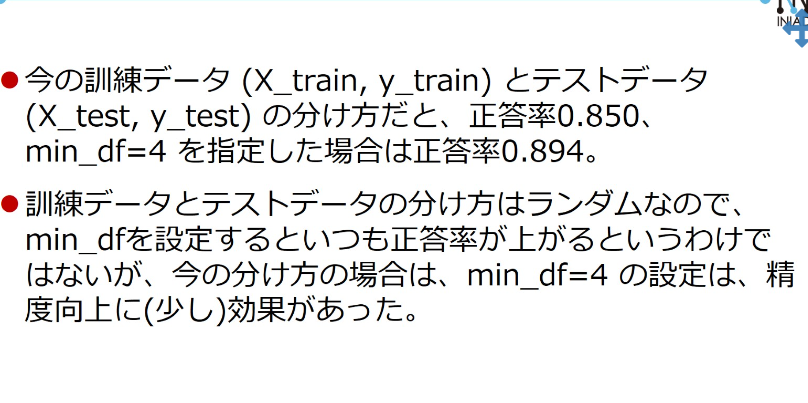